<a href="https://colab.research.google.com/github/jerge/DAT405-DSC/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Download Some Data Related to GDP per capita and life expectancy


### Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [1p]

We decided that we only wanted to use data from one year, since subsequent years would be similar and we did not want to clutter the plot. Furthermore we assumed that each country would have a similar GDP / Life expectancy ratio and thus it would be sufficient to plot only one point per country to see a trend. Plotting the same country multiple times would make it hard to compare them to each other, which seemed to be useful in order to answer the later questions.

We took data from only 2015, since we had the most data from that year.

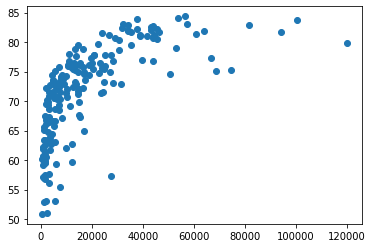

In [9]:
import matplotlib.pyplot as plt
import csv

years = ['2015']
gdpList = []
lifeExpectancyList = []

with open("/content/drive/My Drive/DAT405/gdp-per-capita-worldbank.csv", 'r') as csvfile:
  spamreader = csv.reader(csvfile)
  for row in spamreader:
    if str(row[2]) in years:
      gdpList.append([row[0], float(row[3])])

countriesInGdp = [i[0] for i in gdpList]

with open("/content/drive/My Drive/DAT405/life-expectancy.csv", 'r') as csvfile:
  spamreader = csv.reader(csvfile)
  for row in spamreader:
    if str(row[2]) in years and row[0] in countriesInGdp:
      lifeExpectancyList.append([row[0], float(row[3])])

countriesInLE = [i[0] for i in lifeExpectancyList]

i = 0;
for elem in gdpList:
  if elem[0] in countriesInLE:
    lifeExpectancyList[i].append(elem[1])
    i += 1

c,l,g = zip(*lifeExpectancyList)

plt.scatter(g,l)

#for i, txt in enumerate(c):
#  plt.annotate(txt, (g[i], l[i]))

plt.show()

### Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained. [1p]


The trend seems to be a logarithmic curve with a few outliers. In a richer country the life expectancy increases, which makes sense. If we assume a richer country has a higher GDP per Capita the people in that country should be able to afford all their basic needs and as such avoid starvation and health deficits related to bad hygien and similar things. Further wealth contributes to health care and medicine, but after a certain point there is a diminishing return on how much wealth impacts the life expectancy.

Almost all outliers are a result of the country being pretty poor and then finding oil, resulting in a huge boost in the economy, which has not had the time needed to positively affect the public health. Furthermore the wealth is probably not distributed properly, since the people owning oil is probably just a small percentage of the population.

### Data Cleaning and Why?

In [13]:
import statistics

mean = statistics.mean(l)
stDev = statistics.stdev(l)

highLECountry = []
lowLECountry = []
for (country,le,gdp) in lifeExpectancyList:
  if le > mean + stDev:
    highLECountry.append((country,le,gdp))
  else:
    lowLECountry.append((country,le,gdp))
print(highLECountry)

[('Australia', 82.794, 43923.2582693466), ('Austria', 81.182, 44304.967756787), ('Belgium', 80.969, 41708.2123401731), ('Canada', 82.026, 43149.4758370305), ('Cyprus', 80.35, 30549.1009696787), ('Denmark', 80.475, 45458.697148831), ('Finland', 81.196, 38941.7636030551), ('France', 82.224, 37766.3741116872), ('Germany', 80.77, 43937.9471317278), ('Greece', 81.548, 24170.3018369872), ('Hong Kong', 84.043, 53591.835819824), ('Iceland', 82.481, 43048.1251452787), ('Ireland', 81.344, 60818.0462398536), ('Israel', 82.34, 32024.3527705394), ('Italy', 82.828, 34302.0374026544), ('Japan', 83.879, 37882.980624441), ('Luxembourg', 81.636, 94088.5922250508), ('Macao', 83.707, 100444.593628176), ('Malta', 81.896, 34087.0815138045), ('Netherlands', 81.715, 46494.3642578078), ('New Zealand', 81.713, 35309.8237244851), ('Norway', 81.912, 64008.2868303461), ('Portugal', 81.224, 26607.8331233896), ('Qatar', 79.758, 119749.428536152), ('San Marino', 84.375, 56372.3624231511), ('Singapore', 82.877, 81741.

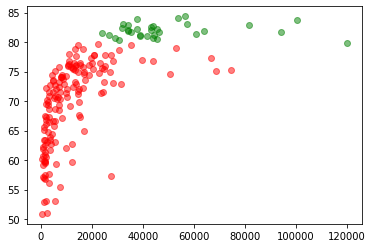

In [15]:
hiC,hiL,hiG = zip(*highLECountry)
lowC,lowL,lowG = zip(*lowLECountry)

plt.scatter(hiG,hiL, color='g', alpha=0.5)
plt.scatter(lowG,lowL, color='r', alpha=0.5)

plt.show()

Antar high lifexpecetency som en std från mean
 
Antar low gpd som en std från mean på höga 


In [26]:
meanHiGDP = statistics.mean(hiG)
stdHiGDP = statistics.stdev(hiG)

highLeHiGDPCountry = []
highLeLowGDPCountry = []

for (country,le,gdp) in lifeExpectancyList:
  if le > mean + stDev and gdp < meanHiGDP - stdHiGDP:
    highLeLowGDPCountry.append((country,le,gdp))
  elif le > mean + stDev:
    highLeHiGDPCountry.append((country,le,gdp))

print(highLeLowGDPCountry)

[('Greece', 81.548, 24170.3018369872)]


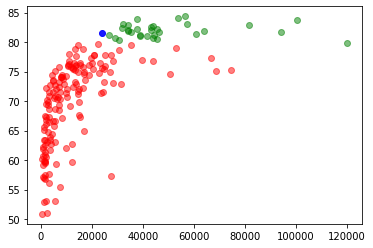

In [27]:
hiHiC,hiHiL,hiHiG = zip(*highLeHiGDPCountry)
hiLowC,hiLowL,hiLowG = zip(*highLeLowGDPCountry)
lowC,lowL,lowG = zip(*lowLECountry)

plt.scatter(hiHiG,hiHiL, color='g', alpha=0.5)
plt.scatter(hiLowG,hiLowL, color='b', alpha=0.9)
plt.scatter(lowG,lowL, color='r', alpha=0.5)

plt.show()